# **PhotoPY**

Essa biblioteca tem como objetivo fornecer ferramentas e funcionalidades para a manipulação, processamento e análise de imagens de forma programática.
Ela foi projetada para facilitar a realização de tarefas como abrir, modificar, salvar e analisar imagens, bem como aplicar diversos filtros e transformações.

#### **Importações**

In [39]:
import PhotoPy as pp
import PhotoPy.convolution
import PhotoPy.texture_attributes
import PhotoPy.histograma
import PhotoPy.save
from PhotoPy.filters import *
from PhotoPy.filters import noise
from PhotoPy.reading import multiple_reading

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## **1 - Histograma**

#### **Importação de imagem e plotagem da mesma em escala de cinza**

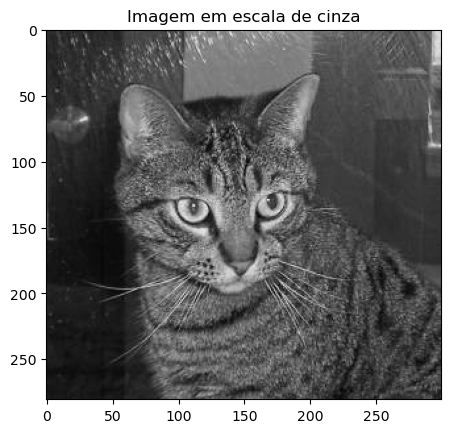

In [2]:
img = cv2.imread('imagens/1.jpg')
img_cinza = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_cinza,cmap='gray'),plt.title("Imagem em escala de cinza");

#### **Equalização da imagem**

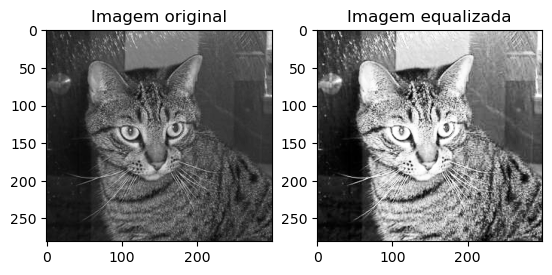

In [3]:
img_cinza = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_equalizada = pp.equalizar(img_cinza)

plt.subplot(121), plt.imshow(img_cinza, cmap='gray'), plt.title('Imagem original');
plt.subplot(122), plt.imshow(img_equalizada, cmap='gray'), plt.title('Imagem equalizada');

#### **Histograma de uma imagem**

Um histograma de uma imagem é uma representação gráfica da distribuição de intensidades de pixels em uma imagem. Ele mostra a frequência com que diferentes níveis de intensidade ocorrem na imagem. O eixo horizontal representa os valores de intensidade (0 a 255 para uma imagem em escala de cinza) e o eixo vertical representa a quantidade de pixels correspondentes a cada intensidade.

In [4]:
hist = pp.calcular_hist(img_cinza)
hist

array([   0,    1,    2,    3,    4,    3,    3,    3,   10,   36,   63,
        152,  327,  321,  365,  348,  381,  413,  476,  624,  745,  759,
        805,  817,  795,  727,  690,  703,  691,  647,  580,  590,  547,
        528,  556,  563,  588,  591,  583,  630,  604,  694,  794,  780,
        906,  900,  996,  913, 1022, 1028,  997,  963,  992,  950, 1002,
       1090, 1141, 1072,  990,  967,  932,  938,  952,  975,  958, 1030,
        928,  963,  935,  938,  900,  917,  900,  929,  853,  932,  833,
        801,  851,  871,  777,  767,  742,  680,  738,  620,  640,  612,
        608,  603,  552,  587,  541,  536,  499,  516,  496,  491,  466,
        468,  436,  442,  480,  386,  409,  428,  394,  391,  450,  415,
        465,  488,  566,  634,  651,  663,  598,  577,  496,  457,  415,
        385,  346,  348,  327,  308,  264,  263,  252,  214,  241,  217,
        221,  196,  183,  172,  186,  166,  145,  155,  158,  124,  138,
        108,  107,  107,  117,  115,   92,  103,   

#### **Descritor Histograma**
Média, Variância, Assimetria, Curtose, Energia e Entropia

In [5]:
pp.descritor_histograma(img)

[71.74562672993278,
 1408.5728545399895,
 0.6547892388562728,
 0.11046645391439869,
 0.008311521440260945,
 7.100070210547706]

A média representa o valor médio das intensidades dos pixels em uma imagem. É calculada somando todas as intensidades de pixels na imagem e dividindo pelo número total de pixels.

$$ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i $$

A variância mede a dispersão das intensidades de pixels na imagem. Uma variância alta indica que as intensidades estão amplamente distribuídas em relação à média, enquanto uma variância baixa indica que as intensidades estão concentradas em torno da média.

$$ \sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 $$

A assimetria (skewness) é uma medida da simetria da distribuição de intensidades de pixels. Valores positivos de assimetria indicam uma cauda longa à direita, enquanto valores negativos indicam uma cauda longa à esquerda.

$$ \text{skewness} = \frac{E[(X - \mu)^3]}{\sigma^3} $$

A curtose (kurtosis) é uma medida da forma da distribuição de intensidades de pixels. Ela descreve quão "afunilada" ou "achatada" é a distribuição em relação a uma distribuição normal. Valores maiores de curtose indicam uma distribuição mais afunilada, enquanto valores menores indicam uma distribuição mais achatada.

$$ \text{Curtose} = \frac{E[(X - \mu)^4]}{\sigma^4} - 3 $$

A energia é uma medida da magnitude das intensidades dos pixels na imagem. É calculada somando os quadrados das intensidades de pixels em toda a imagem. Quanto maior a energia, mais detalhes significativos estão presentes na imagem.

$$ E(I) = \sum_{x} \sum_{y} I(x, y)^2 $$

A entropia mede a incerteza na distribuição de intensidades de pixels na imagem. Ela é calculada a partir da distribuição de probabilidade das intensidades de pixels na imagem. A entropia é maior quando as intensidades estão uniformemente distribuídas.

$$ H(X) = - \sum p(x) \log p(x) $$

*Esses atributos estatísticos capturam informações importantes sobre a distribuição de intensidades de pixels na imagem, o que pode ser útil para discriminar entre imagens de gatos e cães. Eles desempenham um papel fundamental na nossa metodologia para a detecção de gatos e cães, auxiliando o classificador na tarefa de aprendizado de máquina.*

## **2 - Atributos de textura**

#### **Média, Variância, Assimetria, Curtose, Energia e Entropia**

In [6]:
list_attributes = []
list_name = ["Mean","Variance","Assimetria","Curtose","Energia","Entropia"]

list_attributes.append(pp.mean(img))
list_attributes.append(pp.variance(img))
list_attributes.append(pp.skewness(img))
list_attributes.append(pp.kurtosis(img))
list_attributes.append(pp.energy(hist))
list_attributes.append(pp.entropy(hist))

for i in range(len(list_attributes)):
    print(list_name[i])
    print(list_attributes[i],
        "\n___________________")

Mean
71.74562672993278 
___________________
Variance
1408.5728545399895 
___________________
Assimetria
0.6547892388562728 
___________________
Curtose
0.11046645391439869 
___________________
Energia
59065744 
___________________
Entropia
7.100070210547706 
___________________


_Note: existe uma diferença de valores entre o valor da energia retornado pela função "descritor_histograma" pelo valor retornado pela própria função de energia. Isso ocoore porque na primeira função existe a normalização do histograma antes dos cálculos serem realizados, o que termina alterando o resultado._

## **3 - Salvar**

#### **Salvar imagem**

In [7]:
path = 'C:/Users/Augusto Almondes/Documents'
nome = 'Gato'
pp.save_file(img_cinza,path,nome);

Imagem salva em: C:/Users/Augusto Almondes/Documents/Gato


## **4 - Convolução com/sem Bordas**

#### **Definindo o Filtro que será usado**

In [8]:
filtro = np.array([[-1,-2,-1],[0, 0, 0],[1, 2, 1]])

Importando um imagem com baixa qualidade. Isso fará com que as bordas fique mais perceptível.

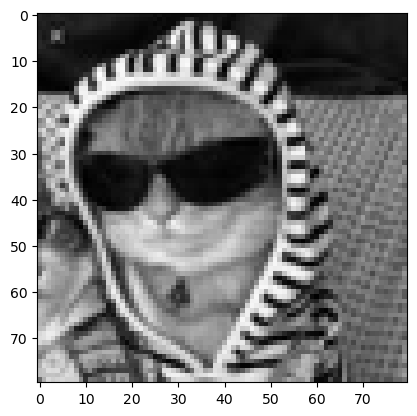

In [9]:
gato = cv2.imread('imagens/gatinho_play.jpg')
gato_cinza = cv2.cvtColor(gato, cv2.COLOR_BGR2GRAY)
plt.imshow(gato_cinza,cmap='gray');

#### Ignorar as bordas

Ignorar as bordas significa que não foi adicionado ou a imagem não possui nenhuma borda. fazendo com que a convolução seja realizado somente nos pixeis padrões da imagem.

In [10]:
borda_ignorada = pp.border_ignore(gato_cinza,filtro)

#### **Refletir bordas**

A borda de espelho reflete os pixels ao longo das bordas da imagem, criando uma imagem espelhada em relação à borda.
Esse método é útil para reduzir artefatos que podem ser introduzidos por bordas artificiais, mantendo a coerência na textura e na estrutura da imagem.

In [11]:
borda_refletida = pp.border_reflect(gato_cinza,filtro)

#### **Bordas zero**

Ao adicionar uma borda de zeros, a imagem é expandida adicionando pixels com valor zero ao redor de todas as bordas.
Isso é útil quando se deseja realizar operações de convolução sem levar em consideração os pixels fora da imagem original. No entanto, pode resultar em efeitos indesejados nas bordas da imagem.

In [12]:
borda_zero = pp.border_zero(gato_cinza,filtro)

#### **Replicar Bordas**

Nesse caso, os pixels nas bordas da imagem são replicados para criar uma borda. Ou seja, os pixels mais externos da imagem são copiados e adicionados como uma borda.
Esse método ajuda a manter a continuidade de padrões na imagem, pois utiliza informações dos pixels mais próximos.

In [13]:
borda_replicada = pp.border_replicate(gato_cinza,filtro)

#### **Plotagem das imagens geradas**

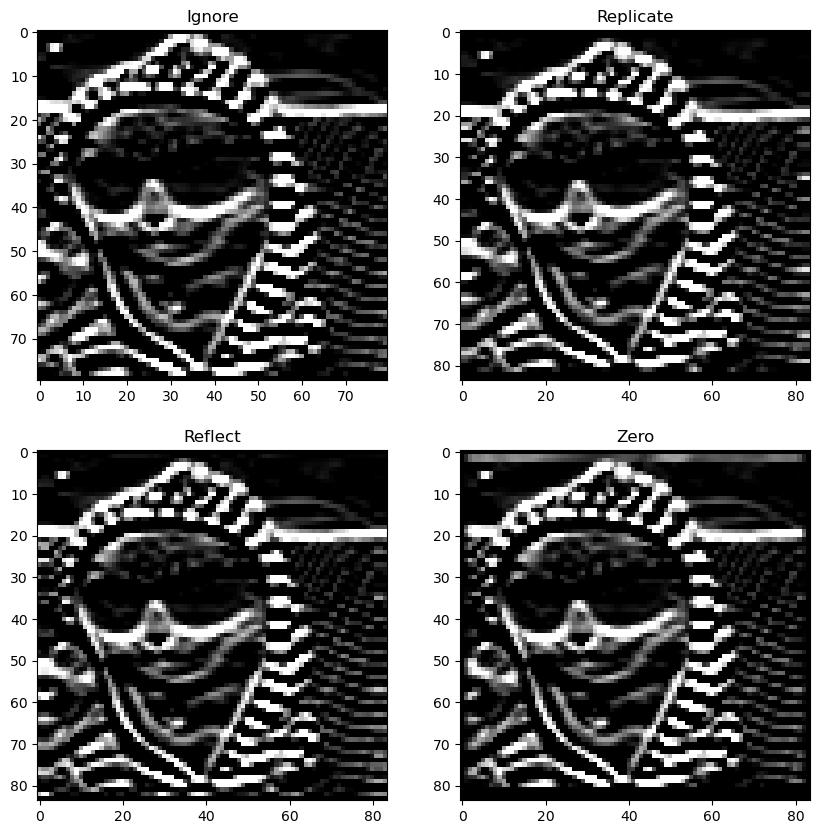

In [14]:
fig,aux = plt.subplots(2,2,figsize=(10,10))

aux[0][0].imshow(borda_ignorada,cmap='gray')
aux[0][0].set_title('Ignore')

aux[0][1].imshow(borda_replicada,cmap='gray')
aux[0][1].set_title('Replicate')

aux[1][0].imshow(borda_refletida,cmap='gray')
aux[1][0].set_title('Reflect')

aux[1][1].imshow(borda_zero,cmap='gray')
aux[1][1].set_title('Zero');

## **5 - Carregar multiplas imagens**

#### **Abrindo multiplas imagens**

In [15]:
path = 'C:/Users/Augusto Almondes/Documents/pack_imagem'
pack = multiple_reading.reading(path)

#### **Tornando todas as imagens em escala de cinza**

In [16]:
pack_cinza = []
for i in pack:
    pack_cinza.append(cv2.cvtColor(i,cv2.COLOR_BGR2GRAY))

#### **PLotando o pack de imagem abertas com a função**

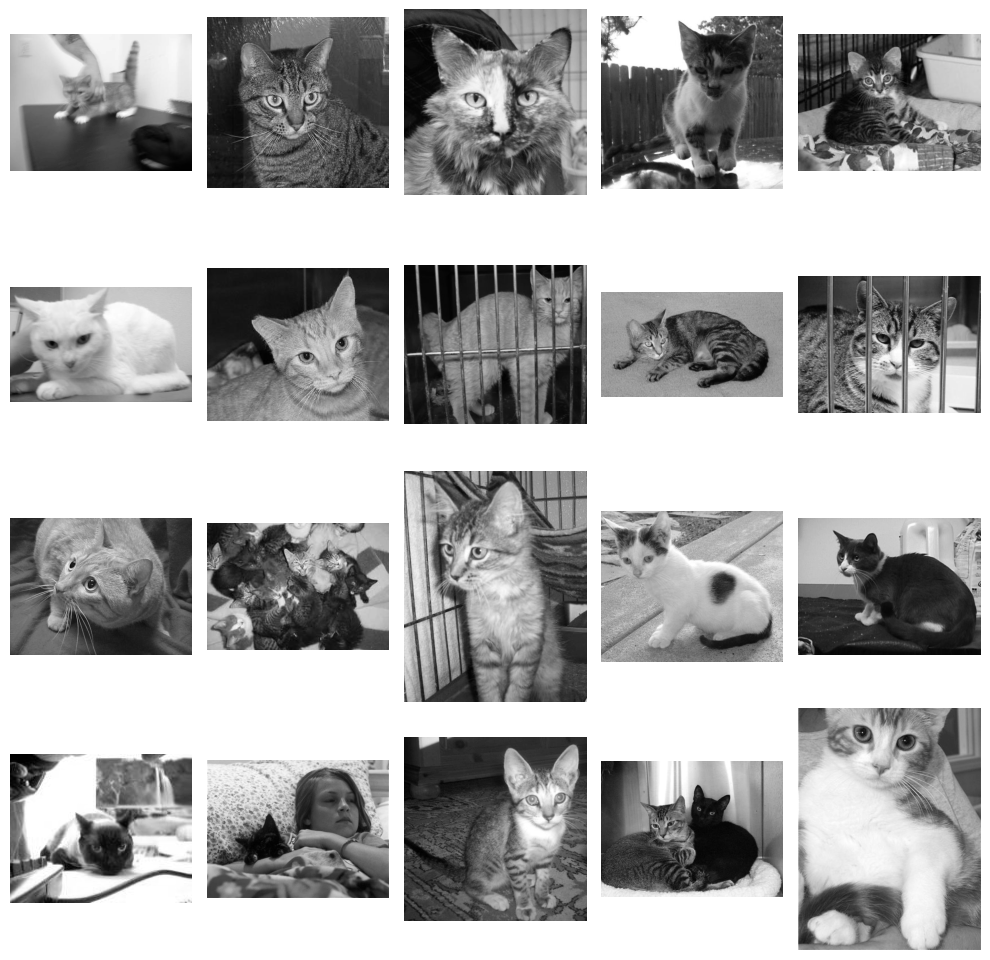

In [17]:
num_colunas = 5
num_linhas = (len(pack_cinza) + num_colunas - 1) // num_colunas

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 10))

for i, imagem in enumerate(pack_cinza):
    linha = i // num_colunas
    coluna = i % num_colunas
    axs[linha, coluna].imshow(imagem, cmap='gray')
    axs[linha, coluna].axis('off')

plt.tight_layout()

## **6 - Filtros**

### **6.1 - Lineares**

Essas funções estão relacionadas ao processamento de imagens e, mais especificamente, ao alargamento de contraste, onde o objetivo é realçar a diferença entre os tons de uma imagem para torná-la mais perceptível.

#### **Alargamento de Contraste**

Para realizar o alargamento de contraste, um parâmetro k controla a intensidade do alargamento, enquanto outro E controla a forma da curva de alargamento. Valores mais altos de k aumentam a intensidade do alargamento. Valores maiores de E produzem uma curva de alargamento mais suave.

### $$ T(r) = \frac{1}{1 + \left(\frac{k}{r}\right)^E} \times 255.0 $$

In [19]:
imagem_alargamento_contraste = pp.filters.alargamento_contraste(gato_cinza,100,8)

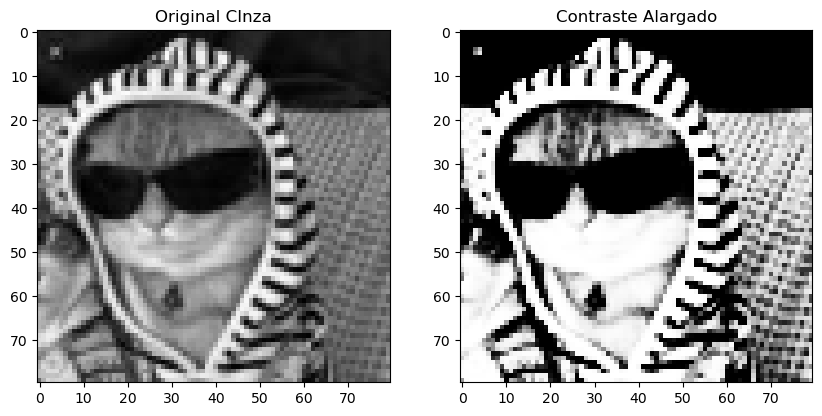

In [20]:
fig, aux = plt.subplots(1,2,figsize=(10,10))

aux[0].imshow(gato_cinza,cmap='gray')
aux[0].set_title('Original CInza')
aux[1].imshow(imagem_alargamento_contraste,cmap='gray')
aux[1].set_title('Contraste Alargado');

#### **Negativo**

Para realizar a função negativo, "L" é o número total de níveis de intensidade (geralmente 256 para imagens de 8 bits). Esta transforma¸c˜ao inverte os tons de cinza na imagem, resultando em um efeito de negativo.

### $$ s = L - 1 - r $$

In [21]:
imagem_negativa = pp.filters.negativo(gato_cinza,256)

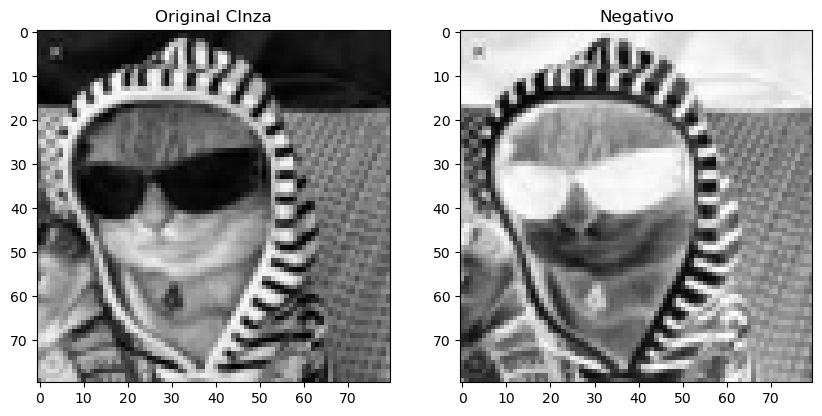

In [22]:
fig, aux = plt.subplots(1,2,figsize=(10,10))

aux[0].imshow(gato_cinza,cmap='gray')
aux[0].set_title('Original CInza')
aux[1].imshow(imagem_negativa,cmap='gray')
aux[1].set_title('Negativo');

#### **Logarítmica**

A transformação logaritmo é então aplicada a cada píxel da imagem. Em termos simples, o logaritmo natural é calculado para cada valor de píxel, e isso é elevado à potência c que é a constante. Essa operação tem o efeito de realçar as diferenças em intensidades nas áreas escuras da imagem.

### $$ s = c \cdot \log(1 + r) $$

In [23]:
imagem_logaritmo = pp.filters.logaritmica(gato_cinza,2)

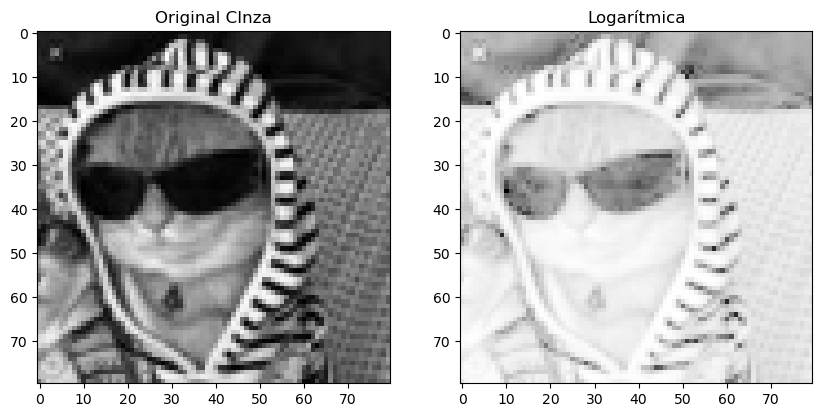

In [24]:
fig, aux = plt.subplots(1,2,figsize=(10,10))

aux[0].imshow(gato_cinza,cmap='gray')
aux[0].set_title('Original CInza')
aux[1].imshow(imagem_logaritmo,cmap='gray')
aux[1].set_title('Logarítmica');

#### **Potência**

Aplica a transformação de potência usando O parâmetro "c" amplifica ou reduz a intensidade global, e gamma controla a forma da curva de potência. Valores de gamma menores que 1 reduzem o contraste, enquanto valores maiores que 1 aumentam o contraste. Essas transformações são aplicadas píxel a píxel na imagem, alterando as intensidades dos pixels conforme as fórmulas específicas de cada função, resultando em diferentes efeitos visuais para melhorar o contraste da imagem.

### $$ s = c \cdot r^{\gamma} $$

In [25]:
imagem_potencia = pp.filters.potencia(gato_cinza,1,0.4)

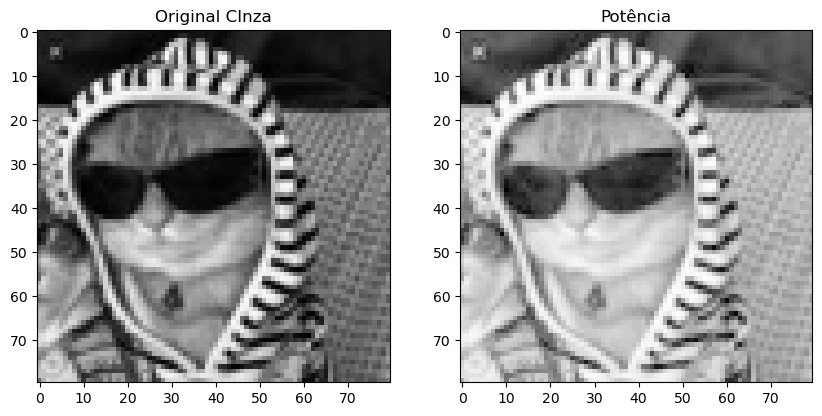

In [26]:
fig, aux = plt.subplots(1,2,figsize=(10,10))

aux[0].imshow(gato_cinza,cmap='gray')
aux[0].set_title('Original CInza')
aux[1].imshow(imagem_potencia,cmap='gray')
aux[1].set_title('Potência');

#### **Laplaciano**

O filtro Laplaciano é usado para realce de bordas, mas também pode ter o efeito colateral de amplificar o ruído presente na imagem. 
Isso ocorre porque o filtro é sensível a variações rápidas de intensidade, o que inclui o ruído.

Se a imagem original já contiver algum ruído, esse ruído será aumentado quando o filtro Laplaciano for aplicado
Em algumas situações, pode ser útil combinar o filtro Laplaciano com técnicas de suavização para reduzir o impacto do ruído.

Então ao aplicar o filtro Laplaciano, você pode esperar um realce nas características de borda e detalhes da imagem, e que isso pode vir acompanhado do aumento do ruído.
A interpretação do resultado depende do contexto específico da aplicação e da qualidade da imagem original.

In [27]:
imagem_laplaciano = pp.filters.linear.laplaciano(gato_cinza)

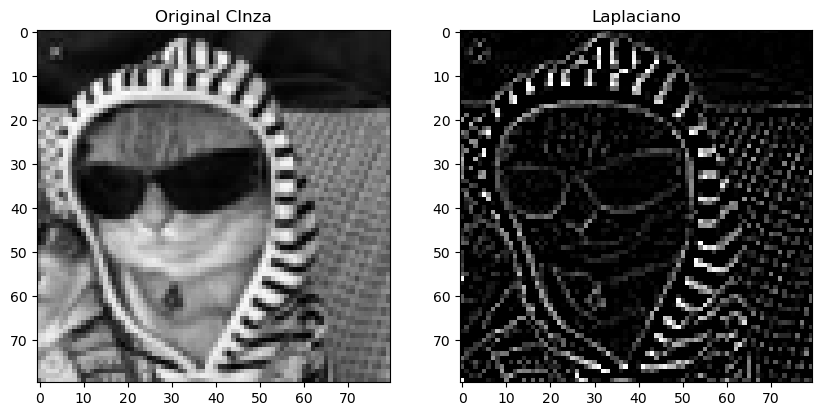

In [28]:
fig, aux = plt.subplots(1,2,figsize=(10,10))

aux[0].imshow(gato_cinza,cmap='gray')
aux[0].set_title('Original CInza')
aux[1].imshow(imagem_laplaciano,cmap='gray')
aux[1].set_title('Laplaciano');

### **6.2 - Não Lineares**

#### **Média**

In [29]:
imagem_media = pp.filters.median(gato_cinza,3)

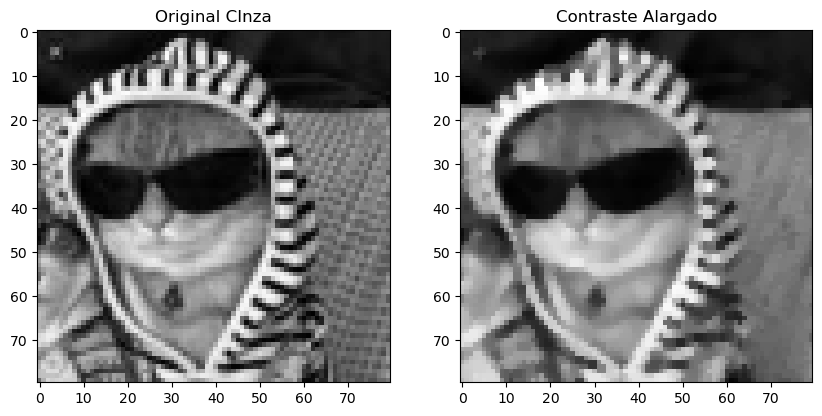

In [30]:
fig, aux = plt.subplots(1,2,figsize=(10,10))

aux[0].imshow(gato_cinza,cmap='gray')
aux[0].set_title('Original CInza')
aux[1].imshow(imagem_media,cmap='gray')
aux[1].set_title('Contraste Alargado');

#### **Moda**

In [31]:
imagem_moda = pp.filters.moda(gato_cinza,3)

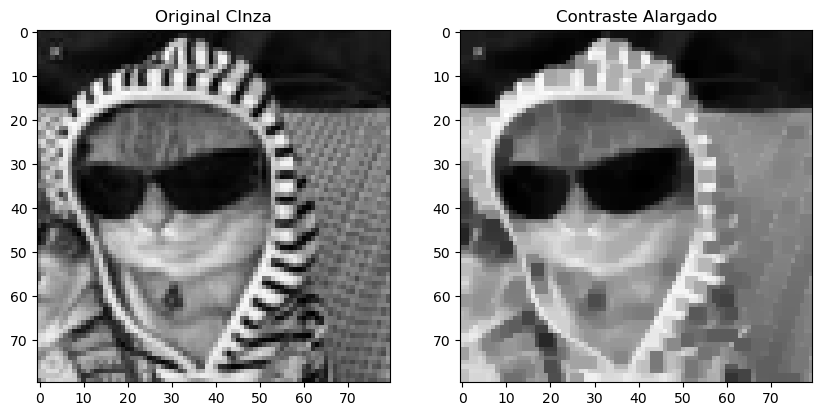

In [32]:
fig, aux = plt.subplots(1,2,figsize=(10,10))

aux[0].imshow(gato_cinza,cmap='gray')
aux[0].set_title('Original CInza')
aux[1].imshow(imagem_moda,cmap='gray')
aux[1].set_title('Contraste Alargado');

#### **Máximo**

In [33]:
imagem_maximo = pp.filters.maximum(gato_cinza,3)

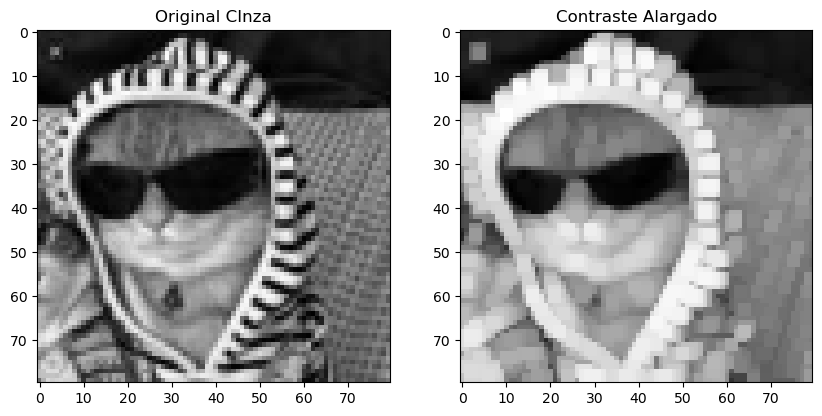

In [34]:
fig, aux = plt.subplots(1,2,figsize=(10,10))

aux[0].imshow(gato_cinza,cmap='gray')
aux[0].set_title('Original CInza')
aux[1].imshow(imagem_maximo,cmap='gray')
aux[1].set_title('Contraste Alargado');

#### **Mínimo**

In [35]:
imagem_minimo = pp.filters.minimum(gato_cinza,3)

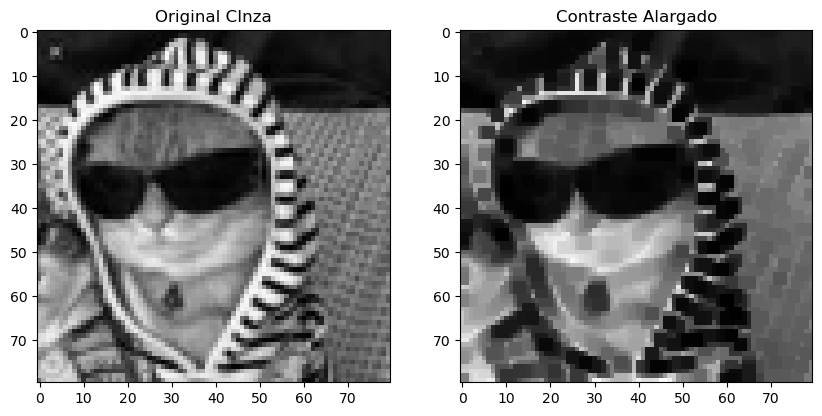

In [36]:
fig, aux = plt.subplots(1,2,figsize=(10,10))

aux[0].imshow(gato_cinza,cmap='gray')
aux[0].set_title('Original CInza')
aux[1].imshow(imagem_minimo,cmap='gray')
aux[1].set_title('Contraste Alargado');

### **6.3 - Ruido**

#### **Ruído Gaussiano**


O ruído gaussiano é um tipo comum de ruído que pode afetar imagens digitais. Esse tipo de ruído é modelado por uma distribuição normal (ou gaussiana) e pode ser introduzido por vários fatores, como imperfeições em sensores de câmera, interferências elétricas, ou processos de transmissão de dados.

O ruído gaussiano é modelado pela função de densidade de probabilidade da distribuição normal (gaussiana):

### $$ G(x, y) = \frac{1}{2\pi\sigma^2} \exp\left(-\frac{x^2 + y^2}{2\sigma^2}\right) $$

In [37]:
cirilo = cv2.imread('imagens/ciliro.jpeg')
cirilo_cinza = cv2.cvtColor(cirilo,cv2.COLOR_BGR2GRAY)
imagem_ruido_gaussiano = pp.filters.noise.gaussiano_noise(cirilo,10)

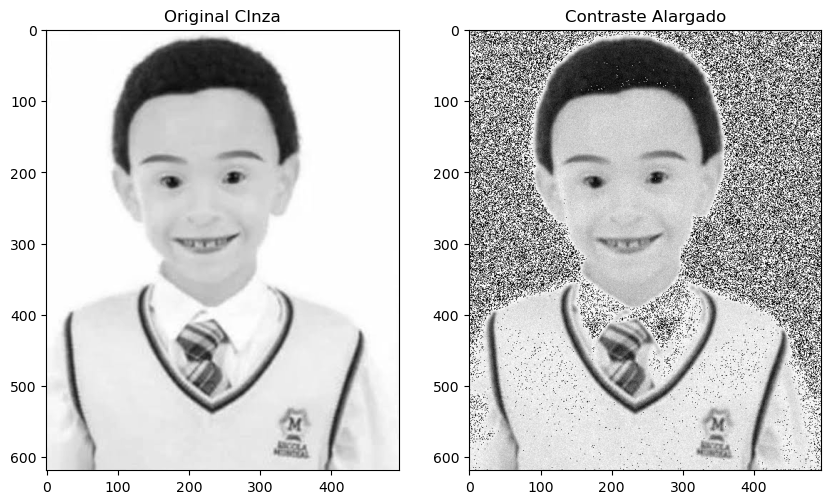

In [38]:
fig, aux = plt.subplots(1,2,figsize=(10,10))

aux[0].imshow(cirilo_cinza,cmap='gray')
aux[0].set_title('Original CInza')
aux[1].imshow(imagem_ruido_gaussiano,cmap='gray')
aux[1].set_title('Contraste Alargado');